In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import ascii 
from scipy.optimize import curve_fit
import glob
from scipy.interpolate import interp1d as i1

In [2]:
jfo_0507 = ascii.read('SN2020jfo_20200507_redblu_130458.033.ascii', format = 'no_header')
jfo_0508 = ascii.read('SN2020jfo_20200508_redblu_130804.977.ascii', format = 'no_header')
jfo_0512 = ascii.read('SN2020jfo_20200512_redblu_083808.860.ascii', format = 'no_header') 
jfo_0516 = ascii.read('SN2020jfo_20200516_redblu_114620.495.ascii', format = 'no_header') 
jfo_0519 = ascii.read('SN2020jfo_20200519_redblu_120343.217.ascii', format = 'no_header') 
jfo_0523 = ascii.read('SN2020jfo_20200523_KAST.csv', format = 'csv', header_start = 18, data_start = 19)#KAST 
jfo_0524 = ascii.read('SN2020jfo_20200524_redblu_105947.534.ascii', format = 'no_header') 
jfo_0528 = ascii.read('SN2020jfo_20200528_redblu_113620.751.ascii', format = 'no_header') 
jfo_0605 = ascii.read('SN2020jfo_20200605_redblu_113353.824.ascii', format = 'no_header') 
jfo_0613 = ascii.read('SN2020jfo_20200613_redblu_071655.424.ascii', format = 'no_header') 
jfo_0626 = ascii.read('SN2020jfo_20200626_redblu_063302.731.ascii', format = 'no_header') 
jfo_0706 = ascii.read('SN2020jfo_20200706_redblu_101237.107.ascii' , format = 'no_header') 
jfo_0714 = ascii.read('SN2020jfo_20200714_redblu_061749.943.ascii', format = 'no_header') 
jfo_0723 = ascii.read('SN2020jfo_20200723_redblu_060251.843.ascii', format = 'no_header') 
jfo_0727 = ascii.read('SN2020jfo_20200727_KAST.csv', format = 'csv', header_start = 18, data_start = 19) #KAST 
jfo_0801 = ascii.read('SN2020jfo_20200801_redblu_082611.283.ascii', format = 'no_header') 
jfo_210212 = ascii.read('SN2020jfo_20210212_LRIS.csv', format = 'csv', header_start = 18, data_start = 19)  #LRIS
jfo_210510 = ascii.read('SN2020jfo_20210510_LRIS.csv', format = 'csv', header_start = 18, data_start = 19) #LRIS 


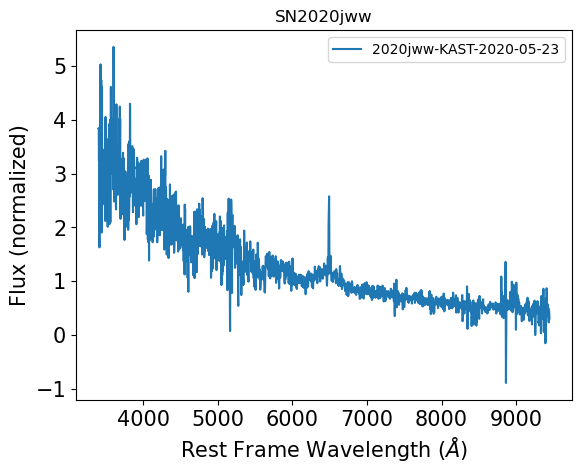

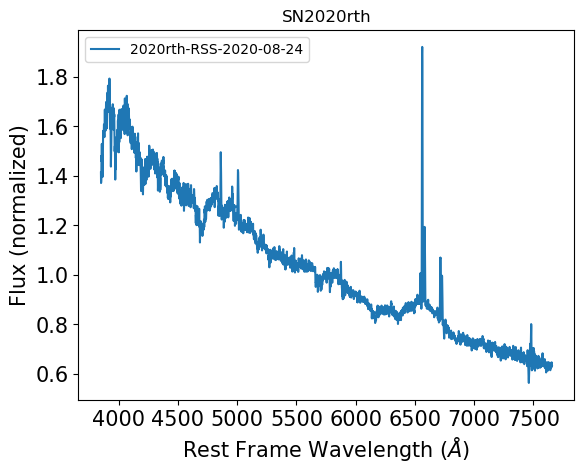

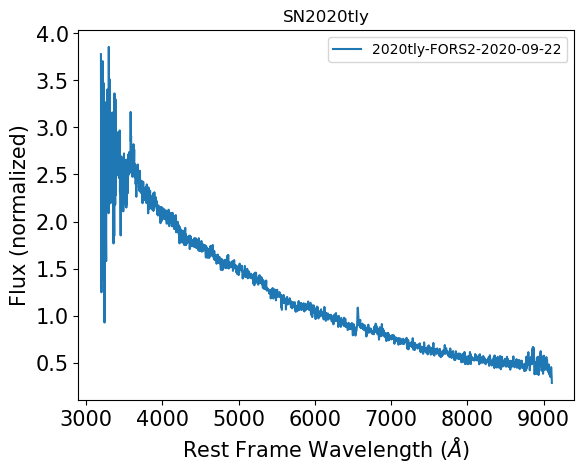

In [3]:
redshifts = [0.043, 0.005, 0.046, 0.0184, 0.058] 
spectra = glob.glob("*.csv")
for idx, file in enumerate(spectra):
    if 'jfo' in file:
        continue 
    if 'hgw' in file:
        continue
    object = ascii.read(file, format = 'csv', header_start = 18, data_start = 19)
    #print(object)
    wavelength = object['wavelength']
    flux = object['flux'] 
    if 'hgw' in file:
        z = redshifts[0]
    elif 'jfo' in file:
        z = redshifts[1] 
    elif 'ovk' in file:
        z = redshifts[2] 
    elif 'rth' in file:
        z = redshifts[3]
    
    else:
        z = redshifts[4]
    label = file.split('.')[0]
    plt.figure(idx)
    plt.title('SN' + file.split('-')[0])
    plt.plot(wavelength / ( 1 + z), flux / np.median(flux), label = label)
    plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
    plt.ylabel('Flux (normalized)', fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.legend()

        


In [4]:
hgw_ALFOSC = ascii.read('2020hgw-ALFOSC-2020-04-29.csv', format = 'csv', header_start = 18, data_start = 19)
hgw_KAST = ascii.read('2020hgw-KAST-2020-05-23.csv', format = 'csv', header_start = 18, data_start = 19)
jww_KAST = ascii.read('2020jww-KAST-2020-05-23.csv', format = 'csv', header_start = 18, data_start = 19)
rth = ascii.read('2020rth-RSS-2020-08-24.csv', format = 'csv', header_start = 18, data_start = 19)
#tly = ascii.read('2020tly-FORS2-2020-09-22.csv', format = 'csv', header_start = 18, data_start = 19)

NOW WE START NA ID ANALYSIS AYOOOOOOOOOOO

FOR NOW IMA DO IT INVIVIDUALLY BUT I WILL ONE DAY MAKE IT A FUNCTION 

In [5]:
na_rest_wavelength = 5892

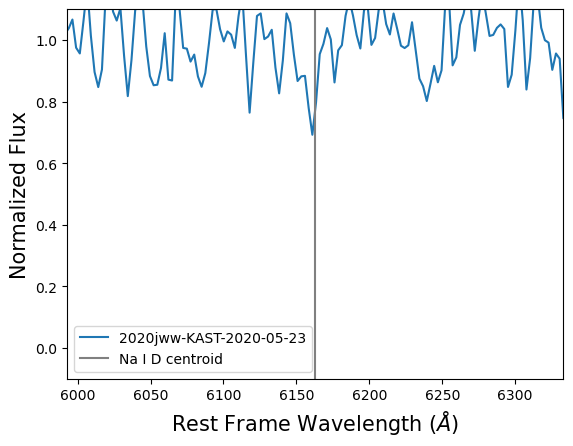

In [6]:
# gonna start with jww since i don't have to stack anything 
jww_centroid = na_rest_wavelength * (1 + redshifts[2])
jww_KAST_wavelength = jww_KAST['wavelength']
jww_KAST_flux = jww_KAST['flux'] 
lower_mask_jww = jww_centroid - 20
upper_mask_jww = jww_centroid + 20
mask_jww = (jww_KAST_wavelength > lower_mask_jww) & (jww_KAST_wavelength < upper_mask_jww)
continuum_jww = ((jww_KAST_wavelength > (lower_mask_jww - 150))&(jww_KAST_wavelength < (lower_mask_jww - 10))|(jww_KAST_wavelength > (upper_mask_jww + 10))&(jww_KAST_wavelength < (upper_mask_jww + 150)))
coeff_jww = np.polyfit(jww_KAST_wavelength[continuum_jww], jww_KAST_flux[continuum_jww], 2)
p_jww = np.poly1d(coeff_jww)
jww_flux_norm = jww_KAST_flux / p_jww(jww_KAST_wavelength)
plt.plot(jww_KAST_wavelength, jww_flux_norm, label = '2020jww-KAST-2020-05-23')
plt.xlim((lower_mask_jww - 150), (upper_mask_jww + 150))
plt.axvline(jww_centroid, color = 'grey', label = 'Na I D centroid')
plt.ylim(-0.1, 1.1)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Normalized Flux', fontsize = 15)
plt.legend()



the width of the absorption line is too small for there to be significant host reddening, so we can say it's 0

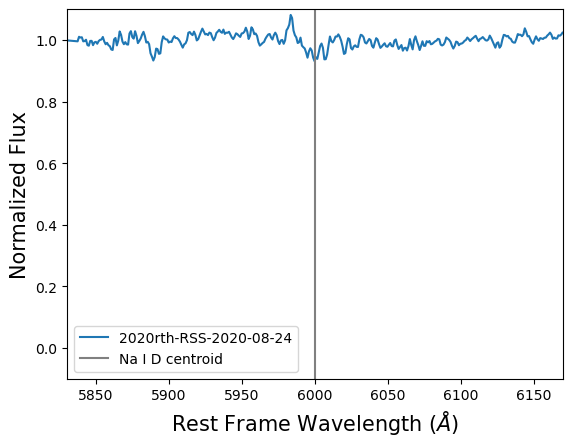

In [7]:
#rth time 
rth_centroid = na_rest_wavelength * (1 + redshifts[3])
rth_wavelength = rth['wavelength']
rth_flux = rth['flux']
lower_mask_rth = rth_centroid - 20 
upper_mask_rth = rth_centroid + 20 
mask_rth = (rth_wavelength > lower_mask_rth) & (rth_wavelength < upper_mask_rth)
continuum_rth = ((rth_wavelength > (lower_mask_rth - 150))&(rth_wavelength < (lower_mask_rth - 10))|(rth_wavelength > (upper_mask_rth + 10))&(rth_wavelength <(upper_mask_rth + 150)))
coeff_rth = np.polyfit(rth_wavelength[continuum_rth], rth_flux[continuum_rth],2)
p_rth = np.poly1d(coeff_rth)
rth_flux_norm = rth_flux / p_rth(rth_wavelength) 
plt.plot(rth_wavelength, rth_flux_norm, label = '2020rth-RSS-2020-08-24')
plt.xlim((lower_mask_rth - 150), (upper_mask_rth + 150))
plt.ylim(-0.1, 1.1)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Normalized Flux', fontsize = 15)
plt.axvline(rth_centroid, color = 'grey', label = 'Na I D centroid')
plt.legend()


In [8]:
rth_centroid

6000.4128

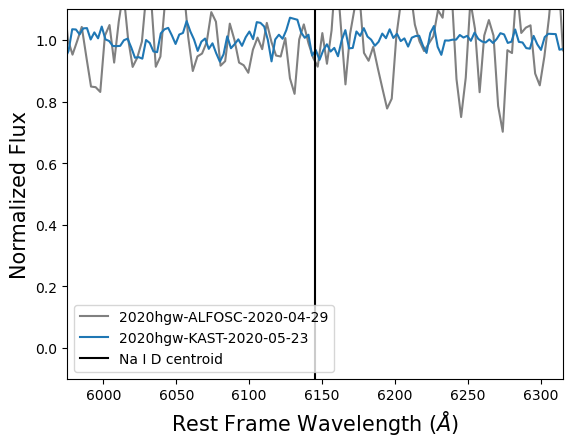

In [9]:
# hgw 
hgw_centroid = na_rest_wavelength * (1 + redshifts[0])
hgw_ALFOSC_wavelength = hgw_ALFOSC['wavelength']
hgw_ALFOSC_flux = hgw_ALFOSC['flux'] 
lower_mask_hgw_ALFOSC = hgw_centroid - 20
upper_mask_hgw_ALFOSC = hgw_centroid + 20
mask_hgw_ALFOSC = (hgw_ALFOSC_wavelength > lower_mask_hgw_ALFOSC) & (hgw_ALFOSC_wavelength < upper_mask_hgw_ALFOSC)
continuum_hgw_ALFOSC = ((hgw_ALFOSC_wavelength > (lower_mask_hgw_ALFOSC - 150))&(hgw_ALFOSC_wavelength < (lower_mask_hgw_ALFOSC - 10))|(hgw_ALFOSC_wavelength > (upper_mask_hgw_ALFOSC + 10))&(hgw_ALFOSC_wavelength < (upper_mask_hgw_ALFOSC + 150)))
coeff_hgw_ALFOSC= np.polyfit(hgw_ALFOSC_wavelength[continuum_hgw_ALFOSC], hgw_ALFOSC_flux[continuum_hgw_ALFOSC], 2)
p_hgw_ALFOSC = np.poly1d(coeff_hgw_ALFOSC)
hgw_ALFOSC_flux_norm = hgw_ALFOSC_flux / p_hgw_ALFOSC(hgw_ALFOSC_wavelength)
#stacking 
hgw_KAST_wavelength = hgw_KAST['wavelength']
hgw_KAST_flux = hgw_KAST['flux'] 
lower_mask_hgw_KAST = hgw_centroid - 20
upper_mask_hgw_KAST = hgw_centroid + 20
mask_hgw_KAST = (hgw_KAST_wavelength > lower_mask_hgw_KAST) & (hgw_KAST_wavelength < upper_mask_hgw_KAST)
continuum_hgw_KAST = ((hgw_KAST_wavelength > (lower_mask_hgw_KAST - 150))&(hgw_KAST_wavelength < (lower_mask_hgw_KAST - 10))|(hgw_KAST_wavelength > (upper_mask_hgw_KAST + 10))&(hgw_KAST_wavelength < (upper_mask_hgw_KAST + 150)))
coeff_hgw_KAST= np.polyfit(hgw_KAST_wavelength[continuum_hgw_KAST], hgw_KAST_flux[continuum_hgw_KAST], 2)
p_hgw_KAST = np.poly1d(coeff_hgw_KAST)
hgw_KAST_flux_norm = hgw_KAST_flux / p_hgw_KAST(hgw_KAST_wavelength)
plt.plot(hgw_ALFOSC_wavelength, hgw_ALFOSC_flux_norm, label = '2020hgw-ALFOSC-2020-04-29', color = 'gray')
plt.plot(hgw_KAST_wavelength, hgw_KAST_flux_norm, label = '2020hgw-KAST-2020-05-23')
plt.xlim((lower_mask_hgw_KAST - 150), (upper_mask_hgw_KAST + 150))
plt.axvline(hgw_centroid, color = 'k', label = 'Na I D centroid')
plt.ylim(-0.1, 1.1)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Normalized Flux', fontsize = 15)
plt.legend()

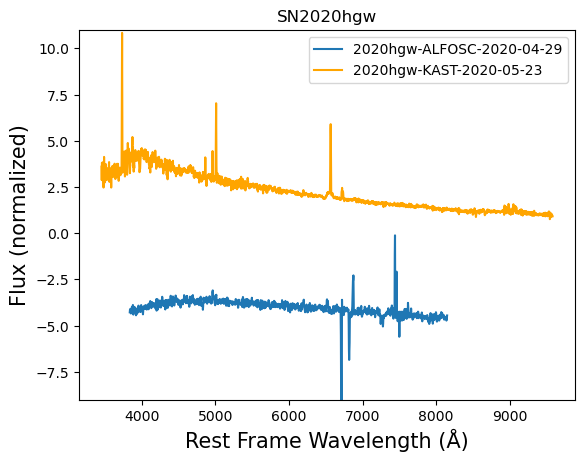

In [10]:
plt.figure()
plt.plot(hgw_ALFOSC_wavelength / (1 + redshifts[0]), hgw_ALFOSC_flux / np.median(hgw_ALFOSC_flux) - 5, label = '2020hgw-ALFOSC-2020-04-29')
plt.plot(hgw_KAST_wavelength / (1 + redshifts[0]), hgw_KAST_flux / np.median(hgw_KAST_flux) * 2, label = '2020hgw-KAST-2020-05-23', color = 'orange')
plt.ylim(-9, 11)
plt.xlabel('Rest Frame Wavelength (Å)', fontsize = 15)
plt.ylabel('Flux (normalized)', fontsize = 15)
plt.title('SN2020hgw')
plt.legend()

Text(0.5, 1.0, 'SN 2020jfo spectral sequence')

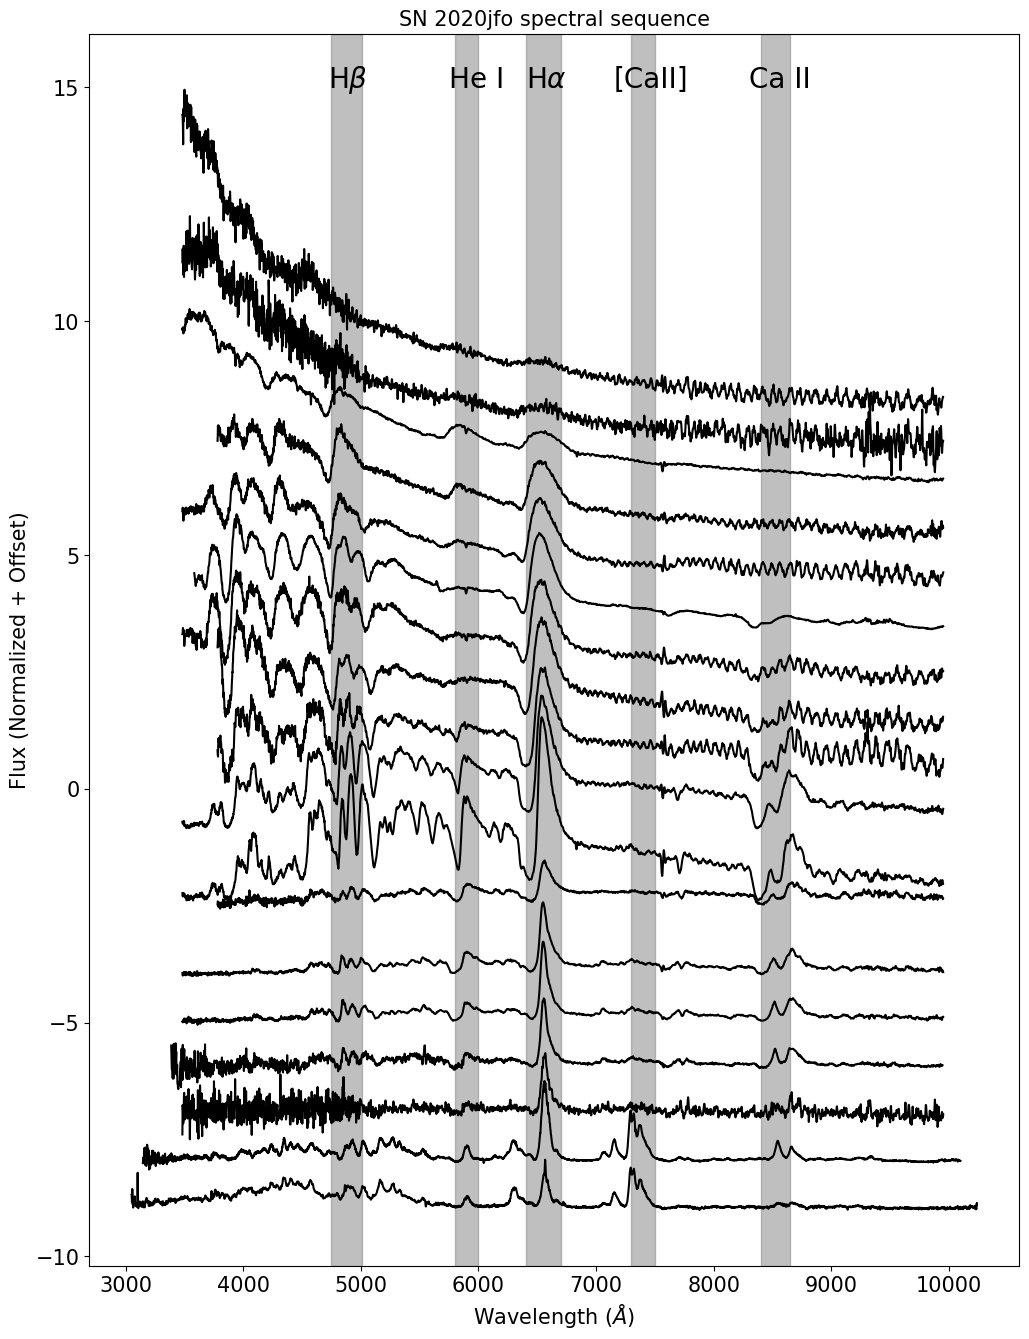

In [72]:
# jfo spectra 

jfo_0507_wl = jfo_0507['col1']
jfo_0507_fx = jfo_0507['col2']

jfo_0508_wl = jfo_0508['col1'] 
jfo_0508_fx = jfo_0508['col2']

jfo_0512_wl = jfo_0512['col1']
jfo_0512_fx = jfo_0512['col2']

jfo_0516_wl = jfo_0516['col1']
jfo_0516_fx = jfo_0516['col2']

jfo_0519_wl = jfo_0519['col1']
jfo_0519_fx = jfo_0519['col2']

jfo_0523_wl = jfo_0523['wavelength']
jfo_0523_fx = jfo_0523['flux']

jfo_0524_wl = jfo_0524['col1']
jfo_0524_fx = jfo_0524['col2']

jfo_0528_wl = jfo_0528['col1']
jfo_0528_fx = jfo_0528['col2']

jfo_0605_wl = jfo_0605['col1']
jfo_0605_fx = jfo_0605['col2']

jfo_0613_wl = jfo_0613['col1']
jfo_0613_fx = jfo_0613['col2']

jfo_0626_wl = jfo_0626['col1']
jfo_0626_fx = jfo_0626['col2']

jfo_0706_wl = jfo_0706['col1']
jfo_0706_fx = jfo_0706['col2']

jfo_0714_wl = jfo_0714['col1']
jfo_0714_fx = jfo_0714['col2']

jfo_0723_wl = jfo_0723['col1']
jfo_0723_fx = jfo_0723['col2']

jfo_0727_wl = jfo_0727['wavelength']
jfo_0727_fx = jfo_0727['flux']

jfo_0801_wl = jfo_0801['col1']
jfo_0801_fx = jfo_0801['col2']

jfo_210212_wl = jfo_210212['wavelength']
jfo_210212_fx = jfo_210212['flux'] 

jfo_210510_wl = jfo_210510['wavelength']
jfo_210510_fx = jfo_210510['flux']

jfo_z = 1 + redshifts[1] 

plt.figure(figsize=(12, 16))
plt.plot(jfo_0507_wl / jfo_z , jfo_0507_fx / np.median(jfo_0507_fx) + 8, color ='k') #1 days 

plt.plot(jfo_0508_wl / jfo_z, jfo_0508_fx / np.median(jfo_0508_fx) + 7, color ='k') #2d 

plt.plot(jfo_0512_wl / jfo_z, jfo_0512_fx / np.median(jfo_0512_fx) + 6.3, color ='k') #6d 

plt.plot(jfo_0516_wl / jfo_z, jfo_0516_fx / np.median(jfo_0516_fx) + 5, color ='k') #10d 

plt.plot(jfo_0519_wl / jfo_z, jfo_0519_fx / np.median(jfo_0519_fx) + 4, color ='k') #13d 

plt.plot(jfo_0523_wl / jfo_z, jfo_0523_fx / np.median(jfo_0523_fx) + 3, color ='k') #16d 

plt.plot(jfo_0524_wl / jfo_z, jfo_0524_fx / np.median(jfo_0524_fx) + 2, color ='k') #17d 

plt.plot(jfo_0528_wl / jfo_z, jfo_0528_fx / np.median(jfo_0528_fx) + 1, color ='k') #21d 

plt.plot(jfo_0605_wl / jfo_z, jfo_0605_fx / np.median(jfo_0605_fx), color ='k') #29d 

plt.plot(jfo_0613_wl / jfo_z, jfo_0613_fx / np.median(jfo_0613_fx) - 1, color ='k') #37d 

plt.plot(jfo_0626_wl / jfo_z, jfo_0626_fx / np.median(jfo_0626_fx) - 2.5, color ='k') #50d 

plt.plot(jfo_0706_wl / jfo_z, jfo_0706_fx / np.median(jfo_0706_fx)/4 - 2.5, color ='k') 

plt.plot(jfo_0714_wl / jfo_z, jfo_0714_fx / np.median(jfo_0714_fx)/5 - 4, color ='k') 

plt.plot(jfo_0723_wl / jfo_z, jfo_0723_fx / np.median(jfo_0723_fx)/6 - 5, color ='k')

plt.plot(jfo_0727_wl / jfo_z, jfo_0727_fx / np.median(jfo_0727_fx)/7 - 6, color ='k')

plt.plot(jfo_0801_wl / jfo_z, jfo_0801_fx / np.median(jfo_0801_fx)/8 - 7, color ='k')

plt.plot(jfo_210212_wl / jfo_z, jfo_210212_fx / np.median(jfo_210212_fx)/9 - 8, color ='k') 

plt.plot(jfo_210510_wl / jfo_z, jfo_210510_fx / np.median(jfo_210510_fx)/9 - 9, color ='k')

plt.axvspan(4750, 5010, color='grey', alpha = 0.5)
plt.text(4720, 15, r'H$\beta$', fontsize = 20)
plt.axvspan(5800, 6000, color = 'grey', alpha= 0.5)
plt.text(5750, 15, r'He I', fontsize = 20)
plt.xlabel('Wavelength $(\AA)$', fontsize = 15)
plt.axvspan(6400, 6700, color = 'grey', alpha = 0.5)
plt.text(6400, 15, r'H$\alpha$', fontsize = 20)
plt.axvspan(7300, 7500, color = 'grey', alpha =0.5)
plt.text(7150, 15, '[CaII]', fontsize = 20)
plt.axvspan(8400, 8650, color = 'grey', alpha=0.5)
plt.text(8300, 15, 'Ca II', fontsize = 20)
plt.ylabel('Flux (Normalized + Offset)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('SN 2020jfo spectral sequence', fontsize = 15)

(0.8, 1.2)

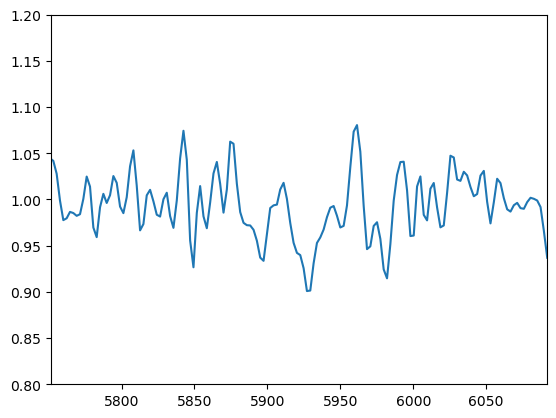

In [19]:
# jfo 
# only wan early time spectra, closest to explosion 
jfo_centroid = na_rest_wavelength * (1 + redshifts[1])

lower_mask = jfo_centroid - 20 
upper_mask = jfo_centroid + 20 

mask_0507 = (jfo_0507_wl > lower_mask) & (jfo_0507_wl < upper_mask) 
continuum_0507 = ((jfo_0507_wl > (lower_mask - 150)) & (jfo_0507_wl < (lower_mask - 10))|(jfo_0507_wl > (upper_mask + 10)) & (jfo_0507_wl < (upper_mask + 150)))
coeff_jfo_0507 = np.polyfit(jfo_0507_wl[continuum_0507], jfo_0507_fx[continuum_0507], 3)
p_jfo0507 = np.poly1d(coeff_jfo_0507)

jfo_0507_fx_norm = jfo_0507_fx / p_jfo0507(jfo_0507_wl) 

plt.plot(jfo_0507_wl, jfo_0507_fx_norm)
plt.xlim(lower_mask - 150, upper_mask + 150)
plt.ylim(0.8, 1.2)


In [13]:
# #jfo 
# #only really want early time spectra, closest to explosion
# jfo_centroid = na_rest_wavelength * (1 + redshifts[1])


# jfo_ALFOSC_wavelength = jfo_ALFOSC['wavelength']
# jfo_ALFOSC_flux = jfo_ALFOSC['flux']
# lower_mask_jfo_ALFOSC = jfo_centroid - 20
# upper_mask_jfo_ALFOSC = jfo_centroid + 20
# mask_jfo_ALFOSC = (jfo_ALFOSC_wavelength > lower_mask_jfo_ALFOSC) & (jfo_ALFOSC_wavelength < upper_mask_jfo_ALFOSC)
# continuum_jfo_ALFOSC = ((jfo_ALFOSC_wavelength > (lower_mask_jfo_ALFOSC - 150))&(jfo_ALFOSC_wavelength < (lower_mask_jfo_ALFOSC - 10))|(jfo_ALFOSC_wavelength > (upper_mask_jfo_ALFOSC + 10))&(jfo_ALFOSC_wavelength < (upper_mask_jfo_ALFOSC + 150)))
# coeff_jfo_ALFOSC= np.polyfit(jfo_ALFOSC_wavelength[continuum_jfo_ALFOSC], jfo_ALFOSC_flux[continuum_jfo_ALFOSC], 3)
# p_jfo_ALFOSC = np.poly1d(coeff_jfo_ALFOSC)
# jfo_ALFOSC_flux_norm = jfo_ALFOSC_flux / p_jfo_ALFOSC(jfo_ALFOSC_wavelength)

# jfo_UNKNOWN_05_06_wavelength = jfo_UNKNOWN_05_06['wavelength']
# jfo_UNKNOWN_05_06_flux = jfo_UNKNOWN_05_06['flux']
# lower_mask_jfo_UK_0506 = jfo_centroid - 20
# upper_mask_jfo_UK_0506= jfo_centroid + 20
# mask_jfo_UK_0506 = (jfo_UNKNOWN_05_06_wavelength > lower_mask_jfo_UK_0506) & (jfo_UNKNOWN_05_06_wavelength < upper_mask_jfo_UK_0506)
# continuum_jfo_UK0506 = ((jfo_UNKNOWN_05_06_wavelength > (lower_mask_jfo_UK_0506 - 150))&(jfo_UNKNOWN_05_06_wavelength < (lower_mask_jfo_UK_0506 - 10))|(jfo_UNKNOWN_05_06_wavelength > (upper_mask_jfo_UK_0506 + 10))&(jfo_UNKNOWN_05_06_wavelength < (upper_mask_jfo_UK_0506 + 150)))
# coeff_jfo_UK0506= np.polyfit(jfo_UNKNOWN_05_06_wavelength[continuum_jfo_UK0506], jfo_UNKNOWN_05_06_flux[continuum_jfo_UK0506], 3)
# p_jfo_UK0506 = np.poly1d(coeff_jfo_UK0506)
# jfo_UK0506_flux_norm = jfo_UNKNOWN_05_06_flux / p_jfo_UK0506(jfo_UNKNOWN_05_06_wavelength)



# jfo_F0507_wavelength = jfo_FLOYDS_05_07['wavelength']
# jfo_F0507_flux = jfo_FLOYDS_05_07['flux']
# lower_mask_jfo_F0507 = jfo_centroid - 20 
# upper_mask_jfo_F0507 = jfo_centroid + 20 
# mask_jfo_F0507 = (jfo_F0507_wavelength > lower_mask_jfo_F0507) & (jfo_F0507_wavelength < upper_mask_jfo_F0507)
# continuum_jfo_F0507 = ((jfo_F0507_wavelength > (lower_mask_jfo_F0507 - 150))&(jfo_F0507_wavelength < (lower_mask_jfo_F0507 - 10))|(jfo_F0507_wavelength > (upper_mask_jfo_F0507 + 10))&(jfo_F0507_wavelength < (upper_mask_jfo_F0507 + 150)))
# coeff_jfo_F0507= np.polyfit(jfo_F0507_wavelength[continuum_jfo_F0507], jfo_F0507_flux[continuum_jfo_F0507], 3)
# p_jfo_F0507 = np.poly1d(coeff_jfo_F0507)
# jfo_F0507_flux_norm = jfo_F0507_flux / p_jfo_F0507(jfo_F0507_wavelength)


# jfo_U0507_wavelength = jfo_UNKNOWN_05_07['wavelength']
# jfo_U0507_flux = jfo_UNKNOWN_05_07['flux']
# lower_mask_jfo_U0507 = jfo_centroid - 20 
# upper_mask_jfo_U0507 = jfo_centroid + 20 
# mask_jfo_U0507 = (jfo_U0507_wavelength > lower_mask_jfo_U0507) & (jfo_U0507_wavelength < upper_mask_jfo_U0507)
# continuum_jfo_U0507 = ((jfo_U0507_wavelength > (lower_mask_jfo_U0507 - 150))&(jfo_U0507_wavelength < (lower_mask_jfo_U0507 - 10))|(jfo_U0507_wavelength > (upper_mask_jfo_U0507 + 10))&(jfo_U0507_wavelength < (upper_mask_jfo_U0507 + 150)))
# coeff_jfo_U0507= np.polyfit(jfo_U0507_wavelength[continuum_jfo_U0507], jfo_U0507_flux[continuum_jfo_U0507], 3)
# p_jfo_U0507 = np.poly1d(coeff_jfo_U0507)
# jfo_U0507_flux_norm = jfo_U0507_flux / p_jfo_U0507(jfo_U0507_wavelength)


# jfo_F0508_wavelength = jfo_FLOYDS_05_08['wavelength']
# jfo_F0508_flux = jfo_FLOYDS_05_08['flux']
# lower_mask_jfo_F0508 = jfo_centroid - 20 
# upper_mask_jfo_F0508 = jfo_centroid + 20 
# mask_jfo_F0508 = (jfo_F0508_wavelength > lower_mask_jfo_F0508) & (jfo_F0508_wavelength < upper_mask_jfo_F0508)
# continuum_jfo_F0508 = ((jfo_F0508_wavelength > (lower_mask_jfo_F0508 - 150))&(jfo_F0508_wavelength < (lower_mask_jfo_F0508 - 10))|(jfo_F0508_wavelength > (upper_mask_jfo_F0508 + 10))&(jfo_F0508_wavelength < (upper_mask_jfo_F0508 + 150)))
# coeff_jfo_F0508 = np.polyfit(jfo_F0508_wavelength[continuum_jfo_F0508], jfo_F0508_flux[continuum_jfo_F0508], 3)
# p_jfo_F0508 = np.poly1d(coeff_jfo_F0508)
# jfo_F0508_flux_norm = jfo_F0508_flux / p_jfo_F0508(jfo_F0508_wavelength)


# jfo_F0512_wavelength = jfo_FLOYDS_05_12['wavelength']
# jfo_F0512_flux = jfo_FLOYDS_05_12['flux']
# lower_mask_jfo_F0512 = jfo_centroid - 20 
# upper_mask_jfo_F0512 = jfo_centroid + 20 
# mask_jfo_F0512 = (jfo_F0512_wavelength > lower_mask_jfo_F0512) & (jfo_F0512_wavelength < upper_mask_jfo_F0512)
# continuum_jfo_F0512 = ((jfo_F0512_wavelength > (lower_mask_jfo_F0512 - 150))&(jfo_F0512_wavelength < (lower_mask_jfo_F0512 - 10))|(jfo_F0512_wavelength > (upper_mask_jfo_F0512 + 10))&(jfo_F0512_wavelength < (upper_mask_jfo_F0512 + 150)))
# coeff_jfo_F0512 = np.polyfit(jfo_F0512_wavelength[continuum_jfo_F0512], jfo_F0512_flux[continuum_jfo_F0512], 2)
# p_jfo_F0512 = np.poly1d(coeff_jfo_F0512)
# jfo_F0512_flux_norm = jfo_F0512_flux / p_jfo_F0512(jfo_F0512_wavelength)

# jfo_U0512_wavelength = jfo_UNKNOWN_05_12['wavelength']
# jfo_U0512_flux = jfo_UNKNOWN_05_12['flux']
# lower_mask_jfo_U0512 = jfo_centroid - 20 
# upper_mask_jfo_U0512 = jfo_centroid + 20 
# mask_jfo_U0512 = (jfo_U0512_wavelength > lower_mask_jfo_U0512) & (jfo_U0512_wavelength < upper_mask_jfo_U0512)
# continuum_jfo_U0512 = ((jfo_U0512_wavelength > (lower_mask_jfo_U0512 - 150))&(jfo_U0512_wavelength < (lower_mask_jfo_U0512 - 10))|(jfo_U0512_wavelength > (upper_mask_jfo_U0512 + 10))&(jfo_U0512_wavelength < (upper_mask_jfo_U0512 + 150)))
# coeff_jfo_U0512 = np.polyfit(jfo_U0512_wavelength[continuum_jfo_U0512], jfo_U0512_flux[continuum_jfo_U0512], 2)
# p_jfo_U0512 = np.poly1d(coeff_jfo_U0512)
# jfo_U0512_flux_norm = jfo_U0512_flux / p_jfo_U0512(jfo_U0512_wavelength)

# jfo_F0516_wavelength = jfo_FLOYDS_05_16['wavelength']
# jfo_F0516_flux = jfo_FLOYDS_05_16['flux']
# lower_mask_jfo_F0516 = jfo_centroid - 20 
# upper_mask_jfo_F0516 = jfo_centroid + 20 
# mask_jfo_F0516 = (jfo_F0516_wavelength > lower_mask_jfo_F0516) & (jfo_F0516_wavelength < upper_mask_jfo_F0516)
# continuum_jfo_F0516 = ((jfo_F0516_wavelength > (lower_mask_jfo_F0516 - 150))&(jfo_F0516_wavelength < (lower_mask_jfo_F0516 - 10))|(jfo_F0516_wavelength > (upper_mask_jfo_F0516 + 10))&(jfo_F0516_wavelength < (upper_mask_jfo_F0516 + 150)))
# coeff_jfo_F0516 = np.polyfit(jfo_F0516_wavelength[continuum_jfo_F0516], jfo_F0516_flux[continuum_jfo_F0516], 2)
# p_jfo_F0516 = np.poly1d(coeff_jfo_F0516)
# jfo_F0516_flux_norm = jfo_F0516_flux / p_jfo_F0516(jfo_F0516_wavelength)


# def gauss(x, *params):
#     peak, wl, fwhm = params
#     y = peak * np.exp(-(x - wl)**2 / fwhm**2)
#     return y 
# p0 = 0.2, 5920, 6
# coeff_jfo_avg = np.polyfit(jfo_UNKNOWN_05_06_wavelength[mask_jfo_UK_0506], jfo_UNKNOWN_05_06_flux[mask_jfo_UK_0506], 2)
# popt, pcov = curve_fit(gauss, jfo_UNKNOWN_05_06_wavelength[mask_jfo_UK_0506], 1 - jfo_UNKNOWN_05_06_flux[mask_jfo_UK_0506], p0 = p0)

# plt.plot(jfo_ALFOSC_wavelength, jfo_ALFOSC_flux_norm, label = '2020jfo-ALFOSC-2020-05-06', color = 'gray')
# plt.plot(jfo_F0507_wavelength, jfo_F0507_flux_norm, label = '2020jfo-FLOYDS-S-2020-05-07', color = 'gray')
# plt.plot(jfo_U0507_wavelength, jfo_U0507_flux_norm, label = '2020jfo-Unknown-2020-05-07', color = 'gray')
# plt.plot(jfo_F0508_wavelength, jfo_F0508_flux_norm, label = '2020jfo-FLOYDS-S-2020-05-08', color = 'gray')
# plt.plot(jfo_F0512_wavelength, jfo_F0512_flux_norm, label = '2020jfo-FLOYDS-N-2020-05-12', color = 'gray')
# plt.plot(jfo_U0512_wavelength, jfo_U0512_flux_norm, label = '2020jfo-Unknown-2020-05-12', color = 'gray') 
# plt.plot(jfo_F0516_wavelength, jfo_F0516_flux_norm, label = '2020jfo-FLOYDS-S-2020-05-16', color = 'gray')
# plt.plot(jfo_UNKNOWN_05_06_wavelength, jfo_UK0506_flux_norm, label = '2020jfo-UNKNOWN-05-06', color = 'k')
# plt.plot(jfo_UNKNOWN_05_06_wavelength, 1 - gauss(jfo_UNKNOWN_05_06_flux, *popt), color = 'r')
# plt.xlim((lower_mask_jfo_ALFOSC - 150), (upper_mask_jfo_ALFOSC + 150))
# plt.ylim(0.8, 1.2)
# plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
# plt.ylabel('Normalized Flux', fontsize = 15)

In [14]:
def gauss(x, *params):
    peak, wl, fwhm = params
    y = peak * np.exp(-(x - wl)**2 / fwhm**2)
    return y 
p0 = 0.2, 5920, 6
# coeff_jfo_avg = np.polyfit(jfo_UNKNOWN_05_06_wavelength[mask_jfo_UK_0506], jfo_UNKNOWN_05_06_flux[mask_jfo_UK_0506], 2)
# popt, pcov = curve_fit(gauss, jfo_UNKNOWN_05_06_wavelength[mask_jfo_UK_0506], 1 - jfo_UNKNOWN_05_06_flux[mask_jfo_UK_0506], p0 = p0)


In [15]:
# plt.figure(figsize=(12,16))
# plt.plot(jfo_UNKNOWN_05_06_wavelength / (1 + redshifts[1]), jfo_UNKNOWN_05_06_flux / np.median(jfo_UNKNOWN_05_06_flux) + 8, color = 'k')
# plt.text(6600, 8.75, 'May 06 (0d)')
# plt.text(6600, 8.5, '(Unknown)')
# plt.plot(jfo_ALFOSC_wavelength / (1 + redshifts[1]), jfo_ALFOSC_flux / np.median(jfo_ALFOSC_flux)/2 + 7.5, color = 'k')
# plt.text(8500, 8, 'May 06 (0d)')
# plt.text(8500, 7.8, '(ALFOSC)')
# plt.plot(jfo_F0507_wavelength / (1 + redshifts[1]), jfo_F0507_flux / np.median(jfo_F0507_flux)/6 + 6.75, color = 'k')
# plt.text(10200, 6.9, 'May 07 (1d)')
# plt.text(10200, 6.7, '(FLOYDS-S)')
# plt.plot(jfo_U0507_wavelength / (1 + redshifts[1]), jfo_U0507_flux / np.median(jfo_U0507_flux)/1.5 + 6.75, color = 'k')
# plt.text(7350, 7.45, 'May 07 (1d)')
# plt.text(7350, 7.25, '(Unknown)')
# plt.plot(jfo_F0508_wavelength / (1 + redshifts[1]), jfo_F0508_flux / np.median(jfo_F0508_flux)/6 + 5.5, color = 'k')
# plt.text(10200, 5.8, 'May 08 (2d)')
# plt.text(10200, 5.5, '(FLOYDS-S)')
# plt.plot(jfo_F0510_wavelength / (1 + redshifts[1]), jfo_F0510_flux / np.median(jfo_F0510_flux)/25 + 5, color = 'k')
# plt.text(10200, 5.2, 'May 10 (4d)')
# plt.text(10200, 5, '(FLOYDS-S)')
# plt.plot(jfo_U0511_wavelength / (1 + redshifts[1]), jfo_U0511_flux / np.median(jfo_U0511_flux)/8 + 4, color = 'k')
# plt.text(7300, 4.2, 'May 11 (5d)')
# plt.text(7300, 4, '(Unknown)')
# plt.plot(jfo_U0512_wavelength / (1 + redshifts[1]), jfo_U0512_flux / np.median(jfo_U0512_flux)/3 + 3, color = 'k')
# plt.text(7300, 3.2, 'May 12 (6d)')
# plt.text(7300, 3, '(Unknown)')
# plt.plot(jfo_F0512_wavelength / (1 + redshifts[1]), jfo_F0512_flux / np.median(jfo_F0512_flux)/2 + 1.5, color = 'k')
# plt.text(10200, 1.8, 'May 12 (6d)')
# plt.text(10200, 1.6, '(FLOYDS-N)')
# plt.plot(jfo_U0514_wavelength / (1 + redshifts[1]), jfo_U0514_flux / np.median(jfo_U0514_flux)/2 + 1, color = 'k')
# plt.text(6700, 1.5, 'May 14 (8d)')
# plt.text(6700, 1.3, '(Unknown)')
# plt.plot(jfo_F0516_wavelength / (1 + redshifts[1]), jfo_F0516_flux / np.median(jfo_F0516_flux)/2, color = 'k')
# plt.text(10200, .4, 'May 16 (10d)')
# plt.text(10200, .2, '(FLOYDS-S)')
# plt.plot(jfo_U0517_wavelength / (1 + redshifts[1]), jfo_U0517_flux / np.median(jfo_U0517_flux)/2 -.5, color = 'k')
# plt.text(6800, -0.2, 'May 17 (11d)')
# plt.text(6800, -0.4, '(Unknown)')
# plt.plot(jfo_F0519_wavelength / (1 + redshifts[1]), jfo_F0519_flux / np.median(jfo_F0519_flux)/6 - 1, color = 'k')
# plt.text(10200, -0.8, 'May 19 (13d)')
# plt.text(10200, -1, '(FLOYDS-S)')
# plt.plot(jfo_U0519_wavelength / (1 + redshifts[1]), jfo_U0519_flux / np.median(jfo_U0519_flux)/2 - 2, color = 'k')
# plt.text(7350, -1.6, 'May 19 (13d)')
# plt.text(7350, -1.8, '(Unknown)')
# plt.plot(jfo_U0520_wavelength / (1 + redshifts[1]), jfo_U0520_flux / np.median(jfo_U0520_flux)/2 - 2.5, color = 'k')
# plt.text(6900, -2.2, 'May 20 (14d)')
# plt.text(6900, -2.4, '(Unknown)')
# plt.plot(jfo_K0523_wavelength / (1 + redshifts[1]), jfo_K0523_flux / np.median(jfo_K0523_flux)/2 - 3.5, color = 'k')
# plt.text(9220, -2.9, 'May 23 (17d)')
# plt.text(9700, -3.2, '(KAST)')
# plt.plot(jfo_F0524_wavelength / (1 + redshifts[1]), jfo_F0524_flux / np.median(jfo_F0524_flux)/2 - 4, color = 'k')
# plt.text(10200, -3.3, 'May 24 (18d)')
# plt.text(10200, -3.5, '(FLOYDS-S)')
# plt.plot(jfo_F0527_wavelength / (1 + redshifts[1]), jfo_F0527_flux / np.median(jfo_F0527_flux)/25 - 4.5, color = 'k')
# plt.text(10200, -4.3, 'May 27 (21d)')
# plt.text(10200, -4.5, '(FLOYDS-S)')
# plt.plot(jfo_F0528_wavelength / (1 + redshifts[1]), jfo_F0528_flux / np.median(jfo_F0528_flux)/2 - 6, color = 'k')
# plt.text(10200, -5.5, 'May 28 (22d)')
# plt.text(10200, -5.7, '(FLOYDS-S)')
# plt.plot(jfo_F0605_wavelength / (1 + redshifts[1]), jfo_F0605_flux / np.median(jfo_F0605_flux)/6 - 6.5, color = 'k')
# plt.text(10200, -6.2, 'Jun 06 (30d)')
# plt.text(10200, -6.4, '(FLOYDS-S)')
# plt.plot(jfo_F0613_wavelength / (1 + redshifts[1]), jfo_F0613_flux / np.median(jfo_F0613_flux)/6 - 7, color = 'k')
# plt.text(10200, -6.8, 'Jun 13 (38d)')
# plt.text(10200, -7.0, '(FLOYDS-N)')
# plt.plot(jfo_F0626_wavelength / (1 + redshifts[1]), jfo_F0626_flux / np.median(jfo_F0626_flux)/6 - 7.5, color = 'k')
# plt.text(10200, -7.4, 'Jun 26 (51d)')
# plt.text(10200, -7.6, '(FLOYDS-N)')
# plt.plot(jfo_K0727_wavelength / (1 + redshifts[1]), jfo_K0727_flux / np.median(jfo_K0727_flux) /12 - 8, color = 'k')
# plt.text(10200, -7.9, 'Jul 27 (82d)')
# plt.text(10200, -8.1, '(KAST)')
# plt.plot(jfo_L0212_wavelength / (1 + redshifts[1]), jfo_L0212_flux / np.median(jfo_L0212_flux)/24 - 8.5, label = '2020jfo-LRIS-2021-02-12', color = 'k')
# plt.text(10200, -8.4, 'Feb 12 (282d)')
# plt.text(10200, -8.6, '(LRIS)')
# plt.ylim(-9, 11)
# plt.xlim(3000, 11500)
# plt.xlabel('Rest Frame Wavelength (Å)', fontsize = 15)
# plt.ylabel('Flux (Normalized + Offset)', fontsize = 15)
# plt.title('SN2020jfo')

In [16]:
# print(hgw_centroid)
# print(jfo_centroid)
# print(jww_centroid)
# print(rth_centroid)
# print(tly_centroid)